# Merging Paper Textures with Augraphy

In this notebook, blending of 2 different textures will be explored to further enhance the background texture.

There will be 7 examples where different combination of blending method will be explored.

In [ ]:
# Installation of Augraphy

!pip install git+https://github.com/sparkfish/augraphy


  Cloning https://github.com/sparkfish/augraphy to /tmp/pip-req-build-wpgm0l6e
  Running command git clone --filter=blob:none --quiet https://github.com/sparkfish/augraphy /tmp/pip-req-build-wpgm0l6e
  Resolved https://github.com/sparkfish/augraphy to commit 80e35ca7aba2a4578d8ba10a03fb7afad64245cc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for augraphy: filename=augraphy-8.2.4-py3-none-any.whl size=203458 sha256=c0199e376175cfed48d5cbacf88155f31131e86a2968668fbf1a0327fcf7e42a
  Stored in directory: /tmp/pip-ephem-wheel-cache-uob4uh5a/wheels/36/d0/21/1aa9ab43fc6934decc10b8a3b839a472b0fed7d3d185b90d51
Successfully built augraphy


In [ ]:
# Import libraries

from augraphy import *
import random
import numpy as np
import cv2
import gdown
import os
import zipfile
from glob import glob
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]

In [ ]:
# download existing paper texture

id = "1114s61-GmHbhIn8f9YNz6OwS3CwkOsIp&authuser=0"
gdown.download(id=id, output="paper_textures.zip", quiet=True)

# extract the zip
with zipfile.ZipFile("paper_textures.zip", 'r') as zip_ref:
    zip_ref.extractall()

# fix the directory name
os.rename("paper textures", "paper_textures")

texture_path = "/content/paper_textures/"

In [ ]:
# download document images

id = "1BuQAGx31AiXD1dj0NvFZNyqhLS5sU9Dd&authuser=0"
gdown.download(id=id, output="imgs.zip", quiet=True)

# extract the zip
with zipfile.ZipFile("imgs.zip", 'r') as zip_ref:
    zip_ref.extractall()



In [ ]:
# get path of documents

document_paths = glob("/content/imgs/*")

In [ ]:
# list of background texture and edge texture

background_textures =  ["normal",
                        "strange",
                        "rough_stains",
                        "fine_stains",
                        "severe_stains",
                        "light_stains",
                        "random_pattern",
                        "dot_granular",
                        "light_granular",
                        "rough_granular"]

edge_textures = ["curvy_edge",
                 "broken_edge"]

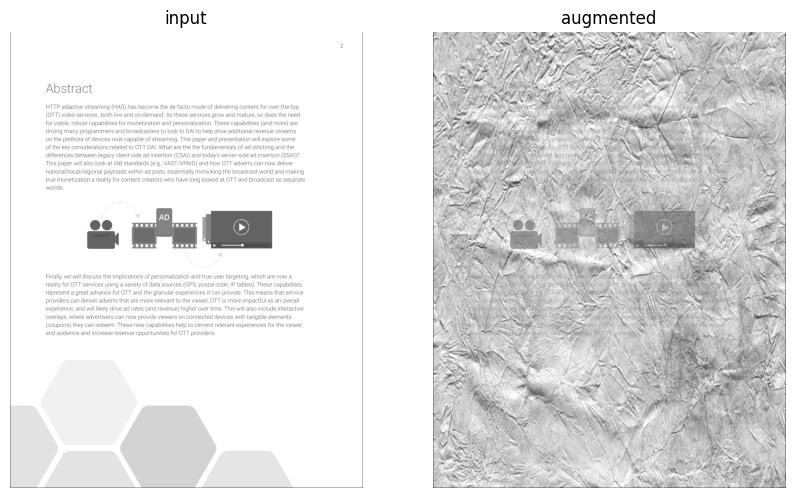

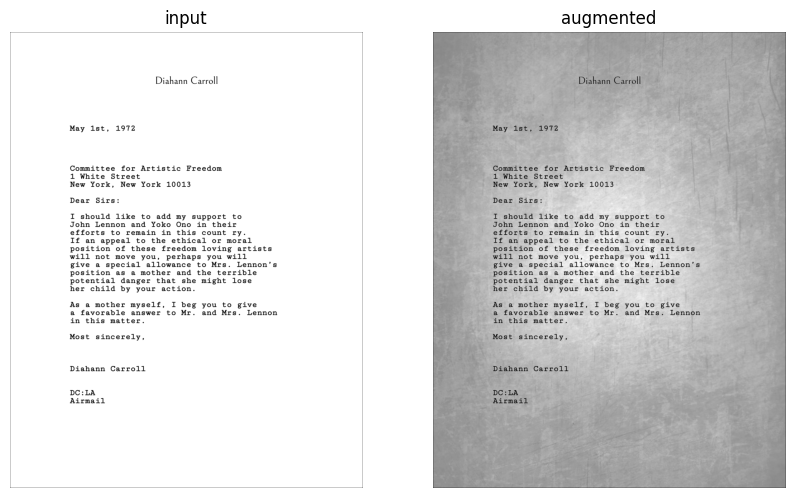

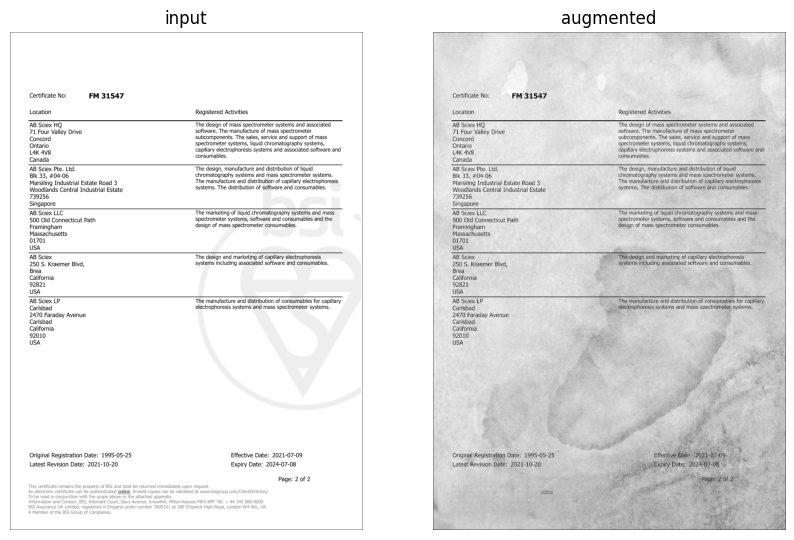

In [ ]:
# Blend both textures from directory

for i in range(3):

    paperfactory = PaperFactory(texture_path=texture_path,
                                generate_texture=0,
                                generate_texture_background_type="random",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 0,
                                blend_texture_path=texture_path,
                                blend_texture_background_type="random",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')

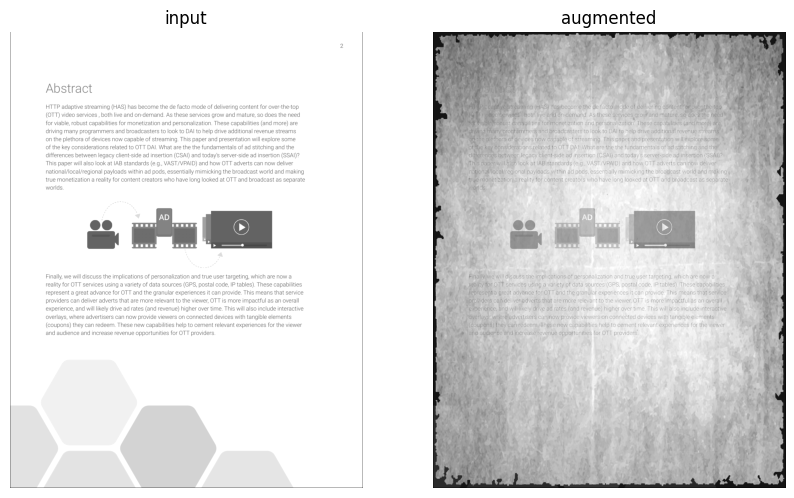

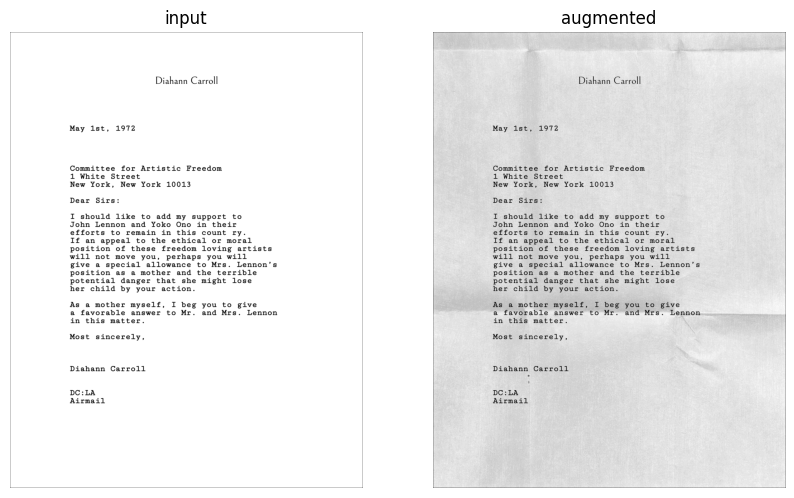

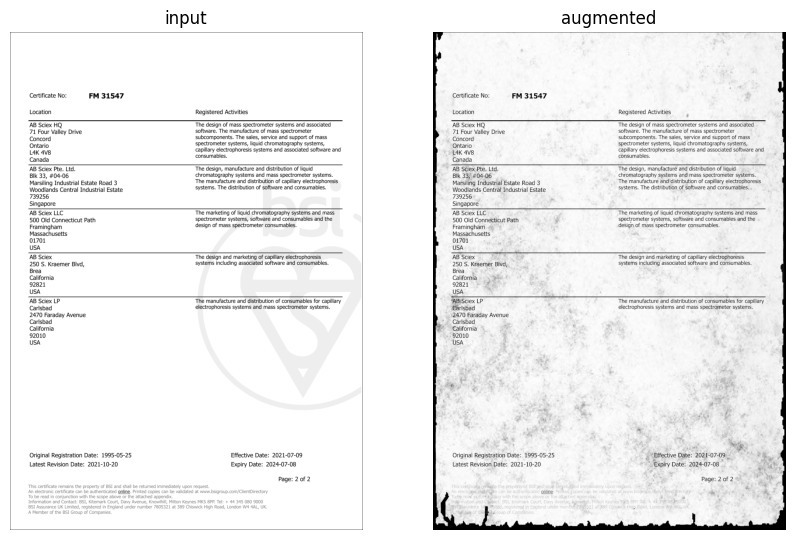

In [ ]:
# Blend both textures where primary texture from directory, while secondary texture from TextureGenerator

for i in range(3):

    paperfactory = PaperFactory(texture_path=texture_path,
                                generate_texture=0,
                                generate_texture_background_type="random",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 1,
                                blend_texture_path="",
                                blend_texture_background_type="random",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')

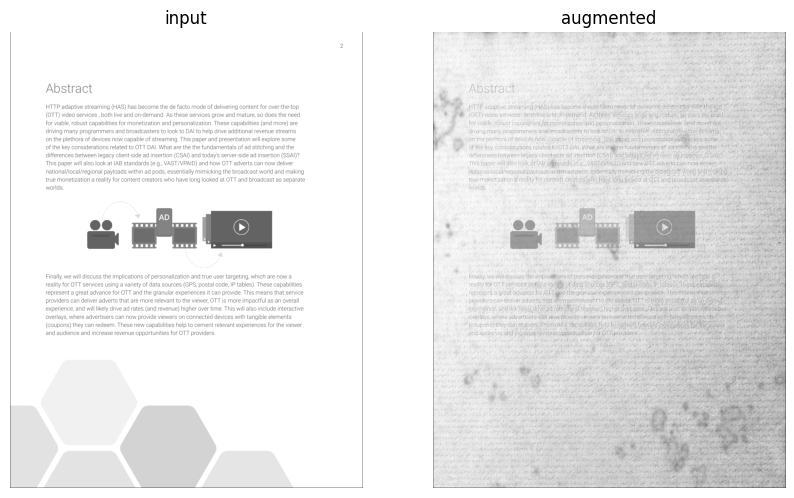

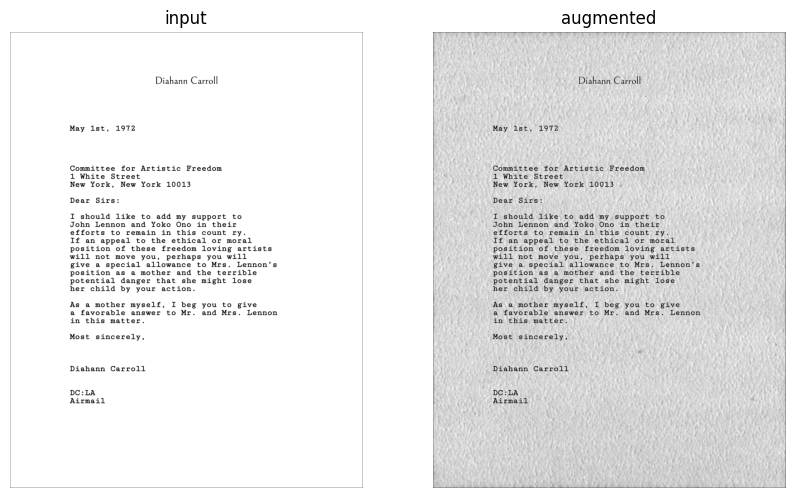

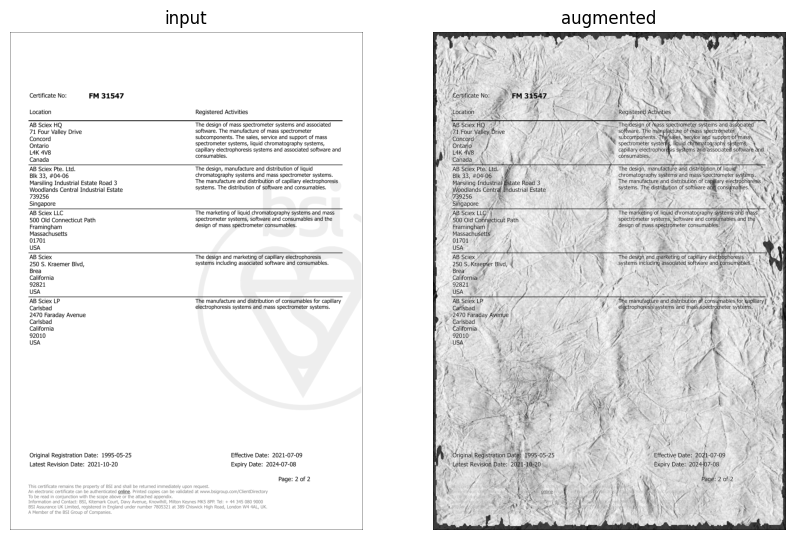

In [ ]:
# Blend both textures where primary texture from TextureGenerator, while secondary texture from directory

for i in range(3):

    paperfactory = PaperFactory(texture_path="",
                                generate_texture=1,
                                generate_texture_background_type="random",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 0,
                                blend_texture_path=texture_path,
                                blend_texture_background_type="random",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')

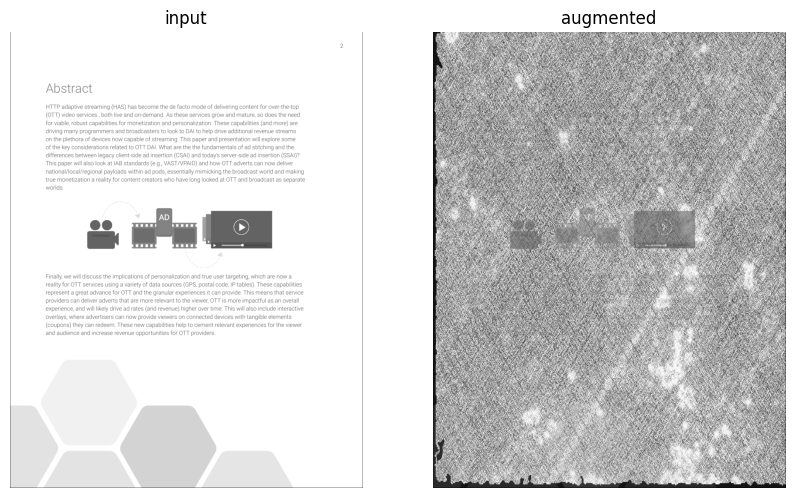

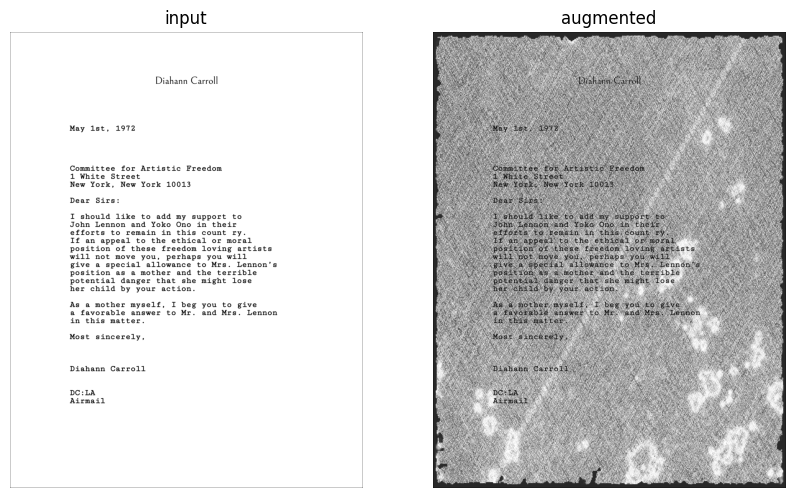

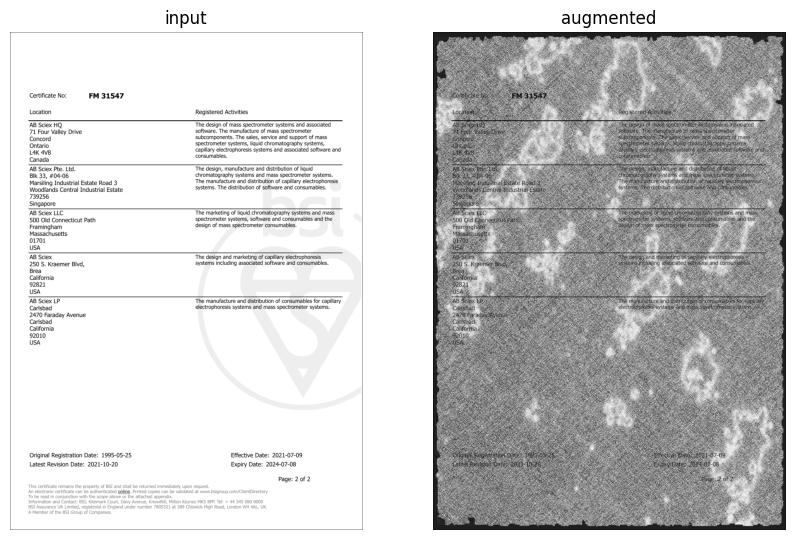

In [ ]:
# Blend both textures from TextureGenerator, where primary texture is "strange", secondary texture is "fine_stains"

for i in range(3):

    paperfactory = PaperFactory(texture_path="",
                                generate_texture=1,
                                generate_texture_background_type="strange",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 1,
                                blend_texture_path="",
                                blend_texture_background_type="fine_stains",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')

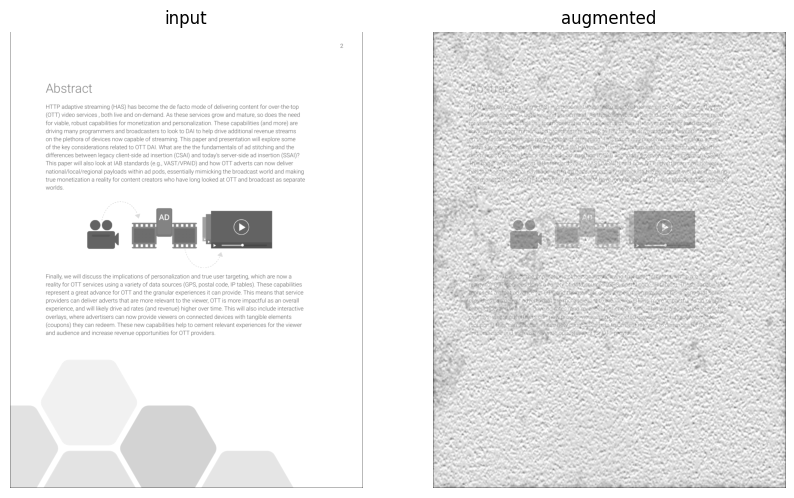

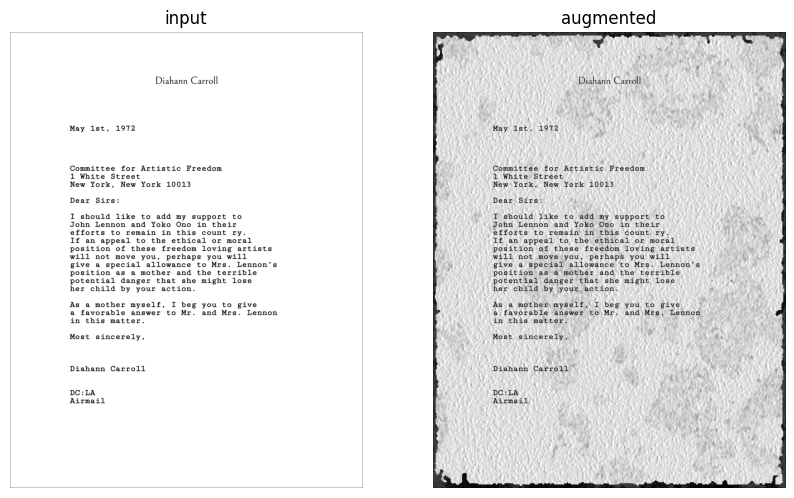

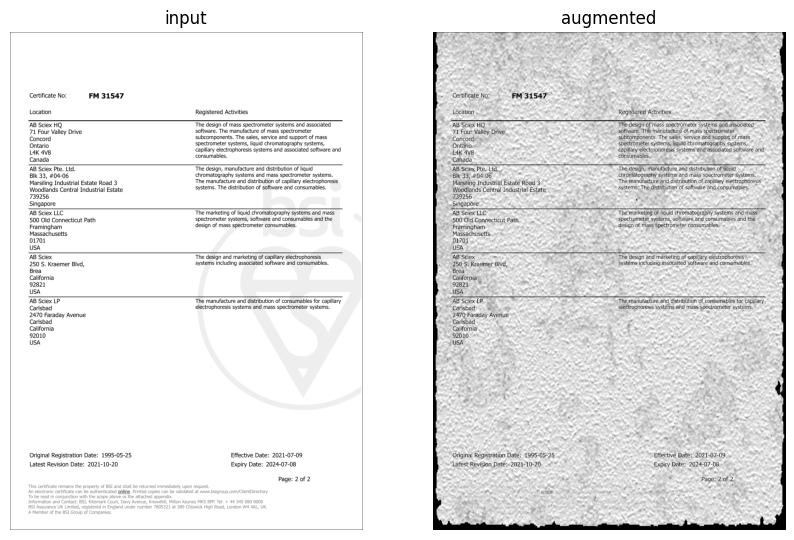

In [ ]:
# Blend both textures from TextureGenerator, where primary texture is "dot_granular", secondary texture is "severe_stains"

for i in range(3):

    paperfactory = PaperFactory(texture_path="",
                                generate_texture=1,
                                generate_texture_background_type="dot_granular",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 1,
                                blend_texture_path="",
                                blend_texture_background_type="severe_stains",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')

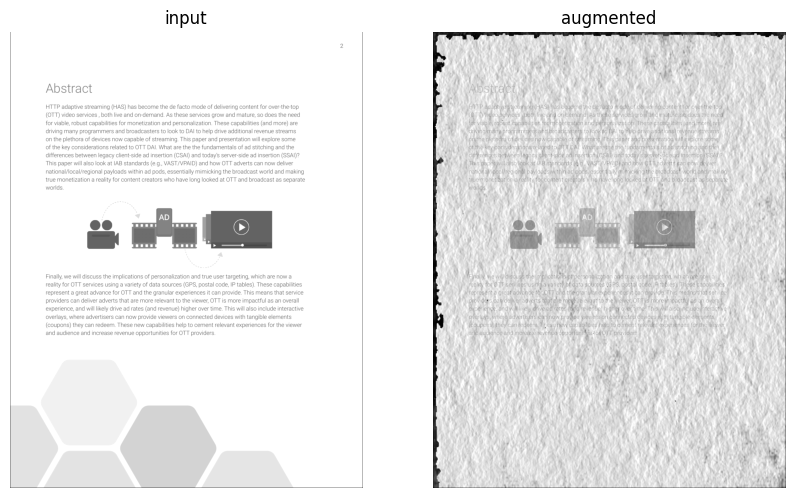

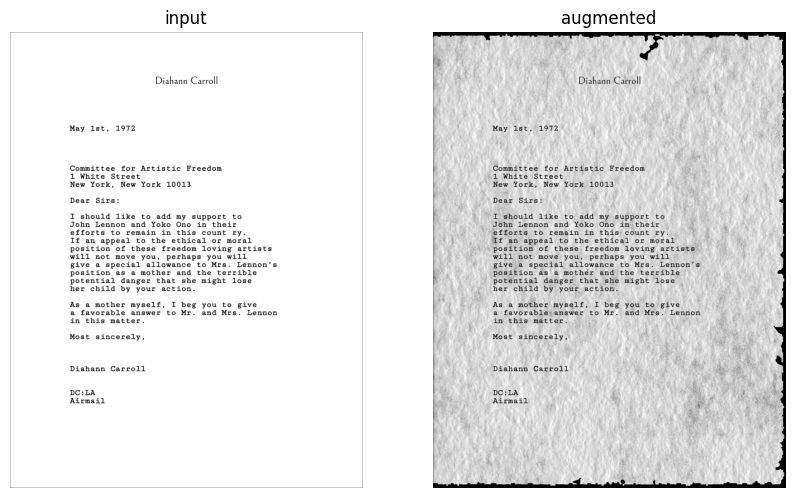

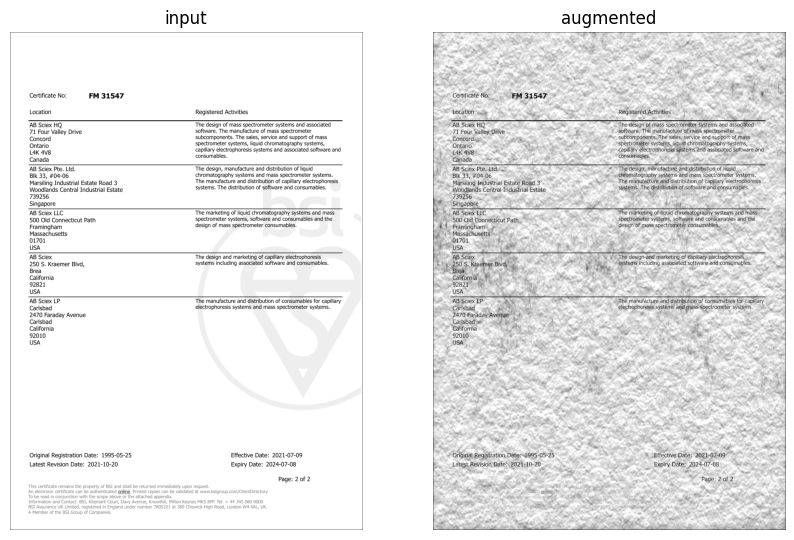

In [ ]:
# Blend both textures from TextureGenerator, where primary texture is "rough_granular", secondary texture is "normal"

for i in range(3):

    paperfactory = PaperFactory(texture_path="",
                                generate_texture=1,
                                generate_texture_background_type="rough_granular",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 1,
                                blend_texture_path="",
                                blend_texture_background_type="normal",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')

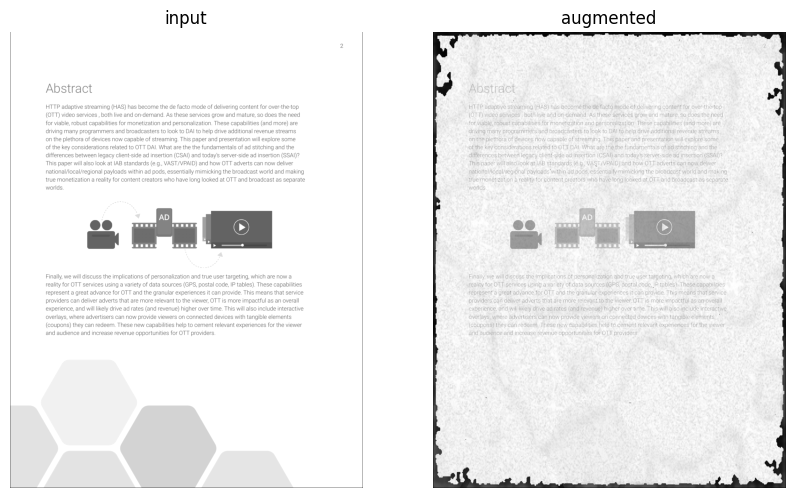

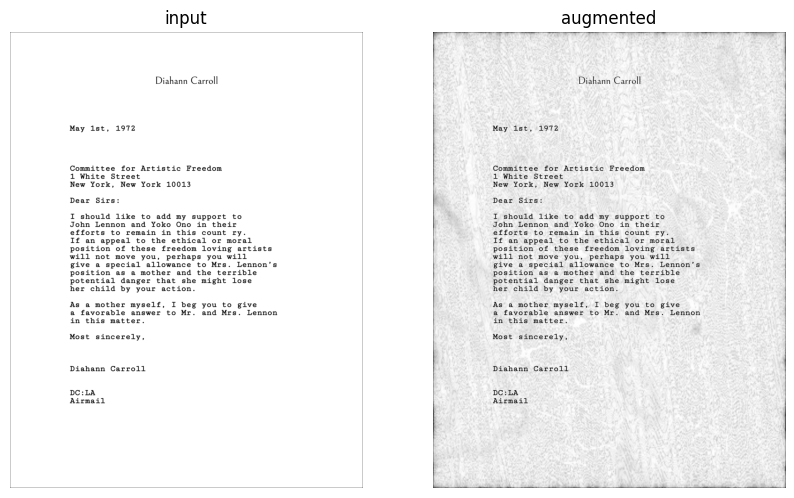

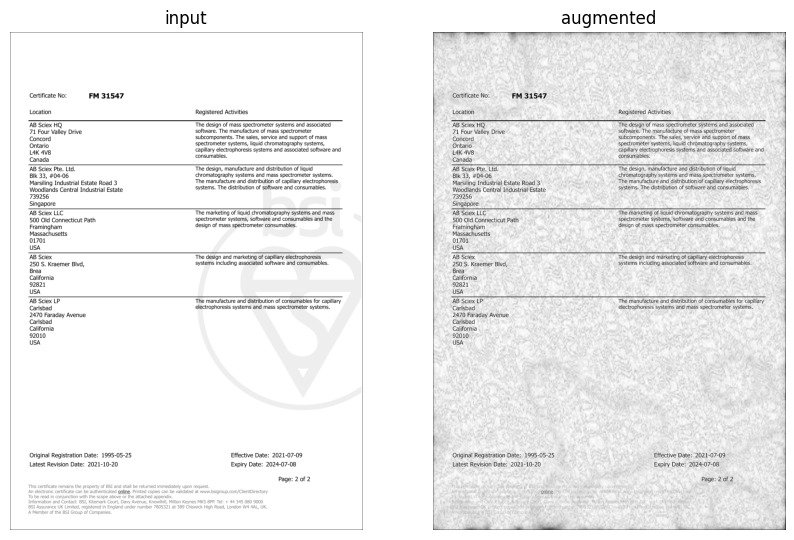

In [ ]:
# Blend both textures from TextureGenerator, where primary texture is "random_pattern", secondary texture is "rough_stains"

for i in range(3):

    paperfactory = PaperFactory(texture_path="",
                                generate_texture=1,
                                generate_texture_background_type="random_pattern",
                                generate_texture_edge_type="random",
                                texture_enable_color=0,
                                blend_texture=1,
                                blend_generate_texture = 1,
                                blend_texture_path="",
                                blend_texture_background_type="rough_stains",
                                blend_texture_edge_type="random",
                                blend_method="ink_to_paper")

    pipeline = AugraphyPipeline(ink_phase=[], paper_phase=[paperfactory], post_phase=[])

    image = cv2.imread(document_paths[i],cv2.IMREAD_GRAYSCALE)

    image_augmented = pipeline(image)

    # create borders
    ysize, xsize = image.shape[:2]
    image[0,:] = 0
    image[ysize-1,:] = 0
    image[:, 0] = 0
    image[:, xsize-1] = 0

    # create borders
    ysize, xsize = image_augmented.shape[:2]
    image_augmented[0,:] = 0
    image_augmented[ysize-1,:] = 0
    image_augmented[:, 0] = 0
    image_augmented[:, xsize-1] = 0

    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(image, cmap="gray")
    plt.title("input")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(image_augmented, cmap="gray")
    plt.title("augmented")
    plt.axis('off')